<a href="https://colab.research.google.com/github/mayank5695/Differential-Privacy/blob/master/Local_privacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 1.x
except Exception:
  pass

import tensorflow as tf

import numpy as np

tf.compat.v1.logging.set_verbosity(tf.logging.ERROR)

Install TensorFlow Privacy.

In [0]:
!pip install tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer

In [0]:
!pip install -q pyyaml h5py

## Load and pre-process the dataset

Load the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset and prepare the data for training.

In [0]:
train, test = tf.keras.datasets.mnist.load_data()
train_data, train_labels = train
test_data, test_labels = test

train_data = np.array(train_data, dtype=np.float32) / 255
test_data = np.array(test_data, dtype=np.float32) / 255

train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

train_labels = np.array(train_labels, dtype=np.int32)
test_labels = np.array(test_labels, dtype=np.int32)

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

assert train_data.min() == 0.
assert train_data.max() == 1.
assert test_data.min() == 0.
assert test_data.max() == 1.
train_data.shape


11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

## Build the learning model

Define a convolutional neural network as the learning model. 

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 8,
                           strides=2,
                           padding='same',
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 1),
    tf.keras.layers.Conv2D(32, 4,
                           strides=2,
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(2, 1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
# normal model
model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])


In [0]:
history=model.fit(train_data, train_labels,
          epochs=epochs,
          validation_data=(test_data, test_labels),
          batch_size=batch_size,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 21s 354us/sample - loss: 0.5072 - acc: 0.8576 - val_loss: 0.1413 - val_acc: 0.9567
Epoch 2/15
60000/60000 [==============================] - 20s 328us/sample - loss: 0.1227 - acc: 0.9629 - val_loss: 0.0869 - val_acc: 0.9736
Epoch 3/15
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0857 - acc: 0.9737 - val_loss: 0.0648 - val_acc: 0.9799
Epoch 4/15
60000/60000 [==============================] - 20s 330us/sample - loss: 0.0668 - acc: 0.9802 - val_loss: 0.0523 - val_acc: 0.9840
Epoch 5/15
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0557 - acc: 0.9833 - val_loss: 0.0438 - val_acc: 0.9861
Epoch 6/15
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0502 - acc: 0.9847 - val_loss: 0.0512 - val_acc: 0.9841
Epoch 7/15
60000/60000 [==============================] - 20s 334us/sample - loss: 0.0432 - acc: 0.9868 

In [0]:
history.history

{'acc': [0.9909833,
  0.99121666,
  0.99223334,
  0.99271667,
  0.99315,
  0.99378335,
  0.9947,
  0.99476665,
  0.99471664,
  0.9957,
  0.9952667,
  0.99565,
  0.99623334,
  0.99645,
  0.99663335],
 'loss': [0.029081047600872503,
  0.02700644302822184,
  0.025584591436199844,
  0.022925902414135634,
  0.02154007863816029,
  0.020281605695587738,
  0.017912654145038686,
  0.016597146920200128,
  0.016986622845676418,
  0.013940705678639158,
  0.014373191498452797,
  0.01370683208721554,
  0.011629528773967952,
  0.01086321683493831,
  0.010284423019523576],
 'val_acc': [0.9902,
  0.9908,
  0.9861,
  0.991,
  0.9886,
  0.9899,
  0.9897,
  0.9885,
  0.9898,
  0.9893,
  0.9903,
  0.9865,
  0.9904,
  0.9909,
  0.9887],
 'val_loss': [0.030437329143751413,
  0.02836781390942633,
  0.04329470240045339,
  0.02935543075436726,
  0.034161051211412996,
  0.030789446888957173,
  0.030948659812565893,
  0.03448528342414647,
  0.029541505960514768,
  0.03473215332487598,
  0.029254326716181823,
  0.

10000/10000 [==============================] - 2s 153us/sample - loss: 0.0290 - acc: 0.9909


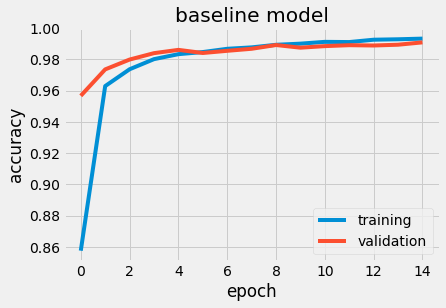

TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

loss_val,metric_acc=model.evaluate(test_data,test_labels,verbose=True)
plt.style.use("fivethirtyeight")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('baseline model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
loss_val,metric_acc

In [0]:
model.save_weights('/simple_model')
model.save('/my_model.h5')

Define the optimizer and loss function for the learning model. Compute the loss as a vector of losses per-example rather than as the mean over a minibatch to support gradient manipulation over each training point. 

## Using local noise in front, Laplacian noise in general and then use this noise to hide the value and run the model again.

---




In [0]:
epsilon=1.18
beta=1/epsilon
train, test = tf.keras.datasets.mnist.load_data()
train_data, train_labels = train
#test_data, test_labels = test

x_train = train_data.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
test_data=np.reshape(test_data,(len(test_data),28,28,1))

In [0]:
epsilon=0.1
beta=1/epsilon
print(x_train.shape)
x_train_noisy = x_train + np.random.laplace(loc=0.0, scale=beta, size=x_train.shape)
#train_labels=train_labels+np.random.laplace(loc=0.0,scale=beta,size=train_labels.shape)
x_train_noisy.shape
test_data.shape
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

(60000, 28, 28, 1)


In [0]:
history=model.fit(x_train_noisy, train_labels,
          epochs=epochs,
          validation_data=(test_data, test_labels),
          batch_size=batch_size,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 20s 333us/sample - loss: 4.9257 - acc: 0.1096 - val_loss: 66.8720 - val_acc: 0.1706
Epoch 2/15
60000/60000 [==============================] - 20s 334us/sample - loss: 2.3013 - acc: 0.1124 - val_loss: 66.8690 - val_acc: 0.1708
Epoch 3/15
60000/60000 [==============================] - 21s 342us/sample - loss: 2.3013 - acc: 0.1124 - val_loss: 66.8737 - val_acc: 0.1707
Epoch 4/15
60000/60000 [==============================] - 20s 334us/sample - loss: 2.3013 - acc: 0.1124 - val_loss: 66.8690 - val_acc: 0.1708
Epoch 5/15
60000/60000 [==============================] - 20s 337us/sample - loss: 2.3013 - acc: 0.1124 - val_loss: 66.8692 - val_acc: 0.1708
Epoch 6/15
60000/60000 [==============================] - 20s 337us/sample - loss: 2.3013 - acc: 0.1124 - val_loss: 66.8712 - val_acc: 0.1708
Epoch 7/15
60000/60000 [==============================] - 20s 336us/sample - loss: 2.3013 - acc: 0

In [0]:
import matplotlib.pyplot as plt

loss_val,metric_acc=model.evaluate(test_data,test_labels,verbose=True)
plt.style.use("fivethirtyeight")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
loss_val,metric_acc

In [0]:
epsilon=1.3
beta=1/epsilon
print(x_train.shape)
x_train_noisy = x_train + np.random.laplace(loc=0.0, scale=beta, size=x_train.shape)
#train_labels=train_labels+np.random.laplace(loc=0.0,scale=beta,size=train_labels.shape)
x_train_noisy.shape
test_data.shape

(60000, 28, 28, 1)


(10000, 28, 28, 1)

In [0]:
history=model.fit(x_train_noisy, train_labels,
          epochs=epochs,
          validation_data=(test_data, test_labels),
          batch_size=batch_size,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 18s 298us/sample - loss: 1610.5110 - acc: 0.1025 - val_loss: 130.9343 - val_acc: 0.3979
Epoch 2/15
60000/60000 [==============================] - 18s 297us/sample - loss: 8.0159 - acc: 0.1029 - val_loss: 129.8417 - val_acc: 0.3909
Epoch 3/15
60000/60000 [==============================] - 18s 298us/sample - loss: 7.9023 - acc: 0.1029 - val_loss: 141.2681 - val_acc: 0.3757
Epoch 4/15
60000/60000 [==============================] - 18s 298us/sample - loss: 3.8996 - acc: 0.1027 - val_loss: 175.5665 - val_acc: 0.3441
Epoch 5/15
60000/60000 [==============================] - 18s 297us/sample - loss: 15.8366 - acc: 0.1027 - val_loss: 168.7845 - val_acc: 0.3196
Epoch 6/15
60000/60000 [==============================] - 18s 298us/sample - loss: 21.0462 - acc: 0.1041 - val_loss: 161.4923 - val_acc: 0.3466
Epoch 7/15
60000/60000 [==============================] - 18s 298us/sample - loss: 33.7

10000/10000 [==============================] - 1s 148us/sample - loss: 75.5103 - acc: 0.3182


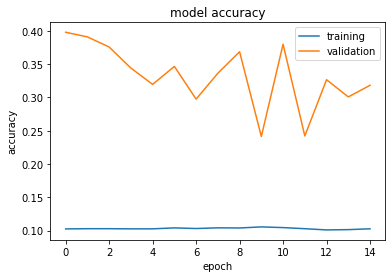

(75.51031228027344, 0.3182)

In [0]:
import matplotlib.pyplot as plt

loss_val,metric_acc=model.evaluate(test_data,test_labels,verbose=True)
plt.style.use("fivethirtyeight")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
loss_val,metric_acc

In [0]:
epsilon=8
beta=1/epsilon
print(x_train.shape)
x_train_noisy = x_train + np.random.laplace(loc=0.0, scale=beta, size=x_train.shape)
#adding noise to training data
train_labels=train_labels+np.random.laplace(loc=0.0,scale=beta,size=train_labels.shape)
x_train_noisy.shape
test_data.shape

history=model.fit(x_train_noisy, train_labels,
          epochs=100,
          validation_data=(test_data, test_labels),
          batch_size=batch_size,verbose=1)

(60000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 18s 301us/sample - loss: -158.0493 - acc: 0.3200 - val_loss: 46.9464 - val_acc: 0.8780
Epoch 2/100
60000/60000 [==============================] - 18s 301us/sample - loss: -156.3881 - acc: 0.3185 - val_loss: 55.8105 - val_acc: 0.8821
Epoch 3/100
60000/60000 [==============================] - 18s 302us/sample - loss: -183.5717 - acc: 0.3202 - val_loss: 104.4157 - val_acc: 0.7789
Epoch 4/100
60000/60000 [==============================] - 18s 299us/sample - loss: -201.5520 - acc: 0.3194 - val_loss: 88.7588 - val_acc: 0.8311
Epoch 5/100
60000/60000 [==============================] - 18s 298us/sample - loss: -217.2284 - acc: 0.3209 - val_loss: 82.2542 - val_acc: 0.8466
Epoch 6/100
60000/60000 [==============================] - 18s 302us/sample - loss: -240.2102 - acc: 0.3182 - val_loss: 81.3466 - val_acc: 0.8823
Epoch 7/100
60000/60000 [=============================

KeyboardInterrupt: ignored

10000/10000 [==============================] - 1s 143us/sample - loss: 37.7610 - acc: 0.8498


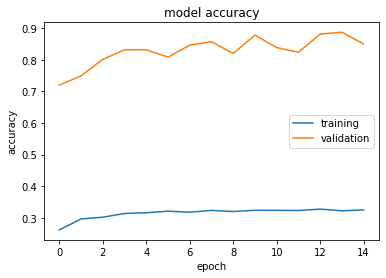

(37.7610272887363, 0.8498)

In [0]:
import matplotlib.pyplot as plt

loss_val,metric_acc=model.evaluate(test_data,test_labels,verbose=True)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
loss_val,metric_acc

(10000, 10)